In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
warnings.filterwarnings("ignore")

# Loading Dataset

In [3]:
df = pd.read_csv('SupervisedData.csv')

In [4]:
df

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190885,0,2.333333,2.666667,2.000000,4.666667,2.333333,3.000000,1.333333,4.000000,2.333333,3.333333,3.000000,3.333333,15.965003,78.342453,26724.41667,48.612200,1017.953334
190886,0,3.000000,3.000000,2.333333,3.000000,3.000000,1.666667,2.000000,4.000000,2.666667,4.000000,2.666667,3.000000,21.286670,82.410637,245.25000,24.160567,957.414450
190887,0,3.000000,3.000000,2.000000,1.333333,2.333333,1.666667,1.666667,4.333333,3.000000,3.333333,3.333333,2.000000,20.504067,83.090750,23715.00000,37.062967,1019.673932
190888,0,3.333333,4.000000,2.666667,3.000000,2.000000,2.333333,3.333333,2.333333,3.666667,4.666667,2.333333,4.333333,25.388310,74.946087,108.00000,10.971567,1005.394574


# Exploratory Data Analysis(EDA)

In [5]:
df.drop(columns =['Aspect', 'Flow','NDWI','Plan','Profile','pressure','NDVI','Lithology'])

,Landslide,Curvature,Earthquake,Elevation,Precipitation,Slope,temperature,humidity,rain,moisture
0,0,3.333333,1.666667,4.000000,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533
1,0,2.666667,2.333333,2.000000,4.333333,2.000000,19.171867,73.905807,27103.16667,75.938967
2,0,2.666667,3.000000,2.000000,5.000000,2.000000,22.785017,78.169993,26689.16667,51.231067
3,0,2.666667,2.666667,2.666667,5.000000,2.666667,23.298793,81.467820,18678.75000,72.093500
4,0,3.666667,2.333333,3.666667,3.666667,3.333333,22.453283,80.013987,26713.91667,53.482733
...,...,...,...,...,...,...,...,...,...,...
190885,0,2.666667,2.000000,4.666667,3.333333,3.333333,15.965003,78.342453,26724.41667,48.612200
190886,0,3.000000,2.333333,3.000000,4.000000,3.000000,21.286670,82.410637,245.25000,24.160567
190887,0,3.000000,2.000000,1.333333,3.333333,2.000000,20.504067,83.090750,23715.00000,37.062967
190888,0,4.000000,2.666667,3.000000,4.666667,4.333333,25.388310,74.946087,108.00000,10.971567


In [6]:
df.shape


(190890, 18)

In [7]:
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


In [8]:
df.tail()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
190885,0,2.333333,2.666667,2.000000,4.666667,2.333333,3.000000,1.333333,4.000000,2.333333,3.333333,3.000000,3.333333,15.965003,78.342453,26724.41667,48.612200,1017.953334
190886,0,3.000000,3.000000,2.333333,3.000000,3.000000,1.666667,2.000000,4.000000,2.666667,4.000000,2.666667,3.000000,21.286670,82.410637,245.25000,24.160567,957.414450
190887,0,3.000000,3.000000,2.000000,1.333333,2.333333,1.666667,1.666667,4.333333,3.000000,3.333333,3.333333,2.000000,20.504067,83.090750,23715.00000,37.062967,1019.673932
190888,0,3.333333,4.000000,2.666667,3.000000,2.000000,2.333333,3.333333,2.333333,3.666667,4.666667,2.333333,4.333333,25.388310,74.946087,108.00000,10.971567,1005.394574
190889,0,3.666667,4.000000,2.000000,2.333333,2.333333,2.000000,3.333333,2.666667,4.000000,3.000000,3.000000,3.333333,23.565307,86.791393,26766.41667,30.106567,1012.350461


In [9]:
df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
count,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000,190890.000000
mean,0.050574,2.969244,3.116282,2.011137,2.588224,2.549421,2.073608,2.942134,2.957473,3.138582,3.538813,3.134014,2.705113,21.214888,83.479932,10701.538371,32.386053,1009.008774
std,0.219126,0.765253,0.594621,0.411790,0.719438,0.718338,0.904329,0.762600,0.792816,0.587506,0.837428,0.551320,0.648160,2.513653,10.523565,14329.081018,19.448532,27.070816
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.357690,32.089743,0.000000,0.000000,655.441696
25%,0.000000,2.333333,2.666667,1.666667,2.000000,2.000000,1.333333,2.333333,2.333333,2.666667,3.000000,2.666667,2.333333,19.585623,76.729984,102.750000,18.741000,1010.863036
50%,0.000000,3.000000,3.000000,2.000000,2.666667,2.666667,2.000000,3.000000,3.000000,3.000000,3.666667,3.000000,2.666667,21.404730,84.812205,774.750000,31.167833,1015.135256
75%,0.000000,3.666667,3.666667,2.333333,3.000000,3.000000,2.666667,3.333333,3.666667,3.666667,4.000000,3.666667,3.000000,23.085639,91.925479,24584.250000,46.112692,1020.232409
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.424500,99.240000,80272.166670,100.000000,1066.855031


In [10]:
numerical=df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope', 'temperature', 'humidity', 'rain', 'moisture', 'pressure'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [11]:
df.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope', 'temperature', 'humidity', 'rain', 'moisture', 'pressure'],
      dtype='object')

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190890 entries, 0 to 190889
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Landslide      190890 non-null  int64  
 1   Aspect         190890 non-null  float64
 2   Curvature      190890 non-null  float64
 3   Earthquake     190890 non-null  float64
 4   Elevation      190890 non-null  float64
 5   Flow           190890 non-null  float64
 6   Lithology      190890 non-null  float64
 7   NDVI           190890 non-null  float64
 8   NDWI           190890 non-null  float64
 9   Plan           190890 non-null  float64
 10  Precipitation  190890 non-null  float64
 11  Profile        190890 non-null  float64
 12  Slope          190890 non-null  float64
 13  temperature    190890 non-null  float64
 14  humidity       190890 non-null  float64
 15  rain           190890 non-null  float64
 16  moisture       190890 non-null  float64
 17  pressure       190890 non-nul

In [13]:
df.count()

Landslide        190890
Aspect           190890
Curvature        190890
Earthquake       190890
Elevation        190890
Flow             190890
Lithology        190890
NDVI             190890
NDWI             190890
Plan             190890
Precipitation    190890
Profile          190890
Slope            190890
temperature      190890
humidity         190890
rain             190890
moisture         190890
pressure         190890
dtype: int64

In [14]:
df.corr()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
Landslide,1.000000,-0.003762,-0.081547,0.078365,-0.073318,-0.103774,-0.047081,0.044766,-0.079159,-0.047619,0.115105,0.083180,0.058456,-0.073946,-0.275792,0.619399,0.241731,0.045108
Aspect,-0.003762,1.000000,-0.018751,0.010247,-0.004338,-0.034460,0.009480,-0.157500,0.171224,-0.035359,0.004871,-0.021183,0.050792,0.003154,0.002374,-0.005491,-0.002291,-0.001289
Curvature,-0.081547,-0.018751,1.000000,-0.057777,0.133082,0.056439,-0.005098,0.093488,-0.081384,0.828051,-0.079899,-0.789159,0.031372,0.015437,0.054003,-0.125387,-0.048133,-0.010257
Earthquake,0.078365,0.010247,-0.057777,1.000000,0.136976,0.076838,0.100208,-0.198059,0.186187,-0.037996,0.860394,0.051656,0.032811,-0.012478,-0.051494,0.120095,0.048629,0.006269
Elevation,-0.073318,-0.004338,0.133082,0.136976,1.000000,0.040294,0.335975,-0.247341,0.218602,0.068371,0.065947,-0.166341,0.269051,0.013460,0.050639,-0.109433,-0.041635,-0.007880
Flow,-0.103774,-0.034460,0.056439,0.076838,0.040294,1.000000,-0.054266,-0.432444,0.498855,0.063029,0.092069,-0.050831,-0.019905,0.019222,0.071420,-0.154543,-0.059582,-0.008470
Lithology,-0.047081,0.009480,-0.005098,0.100208,0.335975,-0.054266,1.000000,-0.106257,0.091532,-0.033728,0.016096,0.034141,0.115525,0.009013,0.036040,-0.071942,-0.024963,-0.006865
NDVI,0.044766,-0.157500,0.093488,-0.198059,-0.247341,-0.432444,-0.106257,1.000000,-0.942490,0.121329,-0.163985,-0.023123,-0.018701,-0.009472,-0.033862,0.067707,0.026835,0.003222
NDWI,-0.079159,0.171224,-0.081384,0.186187,0.218602,0.498855,0.091532,-0.942490,1.000000,-0.111550,0.165114,0.017279,-0.015390,0.016051,0.057501,-0.119796,-0.045883,-0.006697
Plan,-0.047619,-0.035359,0.828051,-0.037996,0.068371,0.063029,-0.033728,0.121329,-0.111550,1.000000,-0.065033,-0.496786,0.009858,0.009711,0.030924,-0.073397,-0.026894,-0.005565


In [15]:
df.sort_values(by="Landslide", ascending=True)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
125618,0,3.333333,3.666667,1.333333,2.333333,2.000000,1.000000,3.000000,3.000000,3.666667,2.333333,3.000000,2.333333,17.473823,73.522780,0.00000,2.886367,1031.516520
125619,0,3.666667,4.333333,2.333333,2.666667,2.000000,3.000000,3.666667,2.000000,4.333333,4.333333,2.333333,1.666667,23.527423,98.114860,174.75000,56.387700,1013.527666
125621,0,1.666667,2.666667,2.333333,2.333333,2.333333,2.666667,1.333333,4.000000,2.666667,4.333333,3.666667,2.666667,24.741853,92.659793,316.50000,45.836900,1025.034738
125622,0,1.666667,3.666667,2.666667,3.333333,2.333333,3.000000,2.333333,3.333333,3.666667,4.333333,3.333333,2.666667,18.571233,62.941413,674.25000,34.405333,1028.780384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168957,1,2.666667,3.666667,2.333333,1.333333,1.333333,1.666667,3.333333,2.000000,3.666667,4.666667,2.666667,3.666667,23.435383,61.162357,51579.00000,33.517033,1020.141342
84550,1,2.666667,2.333333,1.666667,2.333333,1.666667,1.000000,3.333333,2.333333,2.666667,3.666667,3.333333,2.333333,20.005693,62.939700,53333.33333,74.329100,1019.926974
41357,1,3.333333,3.000000,2.333333,3.333333,1.666667,1.666667,4.333333,1.666667,2.666667,3.666667,3.333333,3.333333,20.541610,74.887453,40735.50000,52.668400,1018.167353
84590,1,3.333333,3.000000,2.000000,3.333333,2.000000,3.666667,2.666667,3.000000,4.000000,3.666667,3.666667,3.333333,20.241183,63.187257,76405.16667,65.919833,1023.537290


In [16]:
df.sort_values(by="Landslide", ascending=False)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
126240,1,3.000000,3.666667,2.666667,3.000000,1.666667,2.666667,4.000000,1.333333,3.333333,4.333333,2.666667,3.666667,22.074853,71.746297,44449.50000,41.025300,1019.879513
158922,1,2.333333,2.333333,2.000000,4.000000,2.666667,3.000000,2.666667,3.000000,2.000000,3.333333,2.666667,3.666667,20.140657,78.589437,53333.33333,58.394600,1016.425426
21899,1,3.333333,3.000000,2.000000,3.333333,1.666667,3.666667,3.666667,2.000000,3.000000,3.333333,3.333333,3.000000,23.232817,74.142000,49810.91667,73.379633,1020.018353
89031,1,3.333333,2.333333,2.000000,1.000000,2.000000,1.666667,3.666667,2.333333,2.000000,3.666667,3.000000,2.666667,19.673707,86.834517,40938.75000,43.922000,1014.701004
181555,1,2.333333,2.333333,3.000000,2.333333,1.333333,2.666667,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,19.178110,64.561287,47997.00000,34.360233,1024.682517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65324,0,4.333333,3.333333,2.666667,2.333333,2.666667,2.666667,2.000000,4.000000,3.333333,5.000000,2.666667,3.666667,21.627287,71.619540,28927.50000,52.808600,1023.056768
65325,0,2.666667,3.000000,2.333333,1.666667,3.000000,2.333333,3.666667,2.000000,2.666667,4.666667,3.000000,3.000000,18.555977,80.644590,24729.00000,23.210867,1017.026295
65326,0,4.000000,3.666667,2.333333,2.333333,3.000000,1.000000,2.333333,3.333333,4.000000,5.000000,3.000000,2.333333,24.740287,96.262620,277.50000,26.782900,1012.156984
65328,0,3.333333,2.666667,2.333333,3.666667,2.000000,1.666667,2.333333,3.333333,3.000000,3.333333,3.666667,2.333333,20.414897,70.802783,0.00000,3.656500,1024.960565


In [17]:
df.isnull().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
temperature      0
humidity         0
rain             0
moisture         0
pressure         0
dtype: int64

In [18]:
dis_features = [feature for feature in df.columns if len(df[feature].unique()) < 20 ]
print(dis_features)

['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']


<AxesSubplot:>

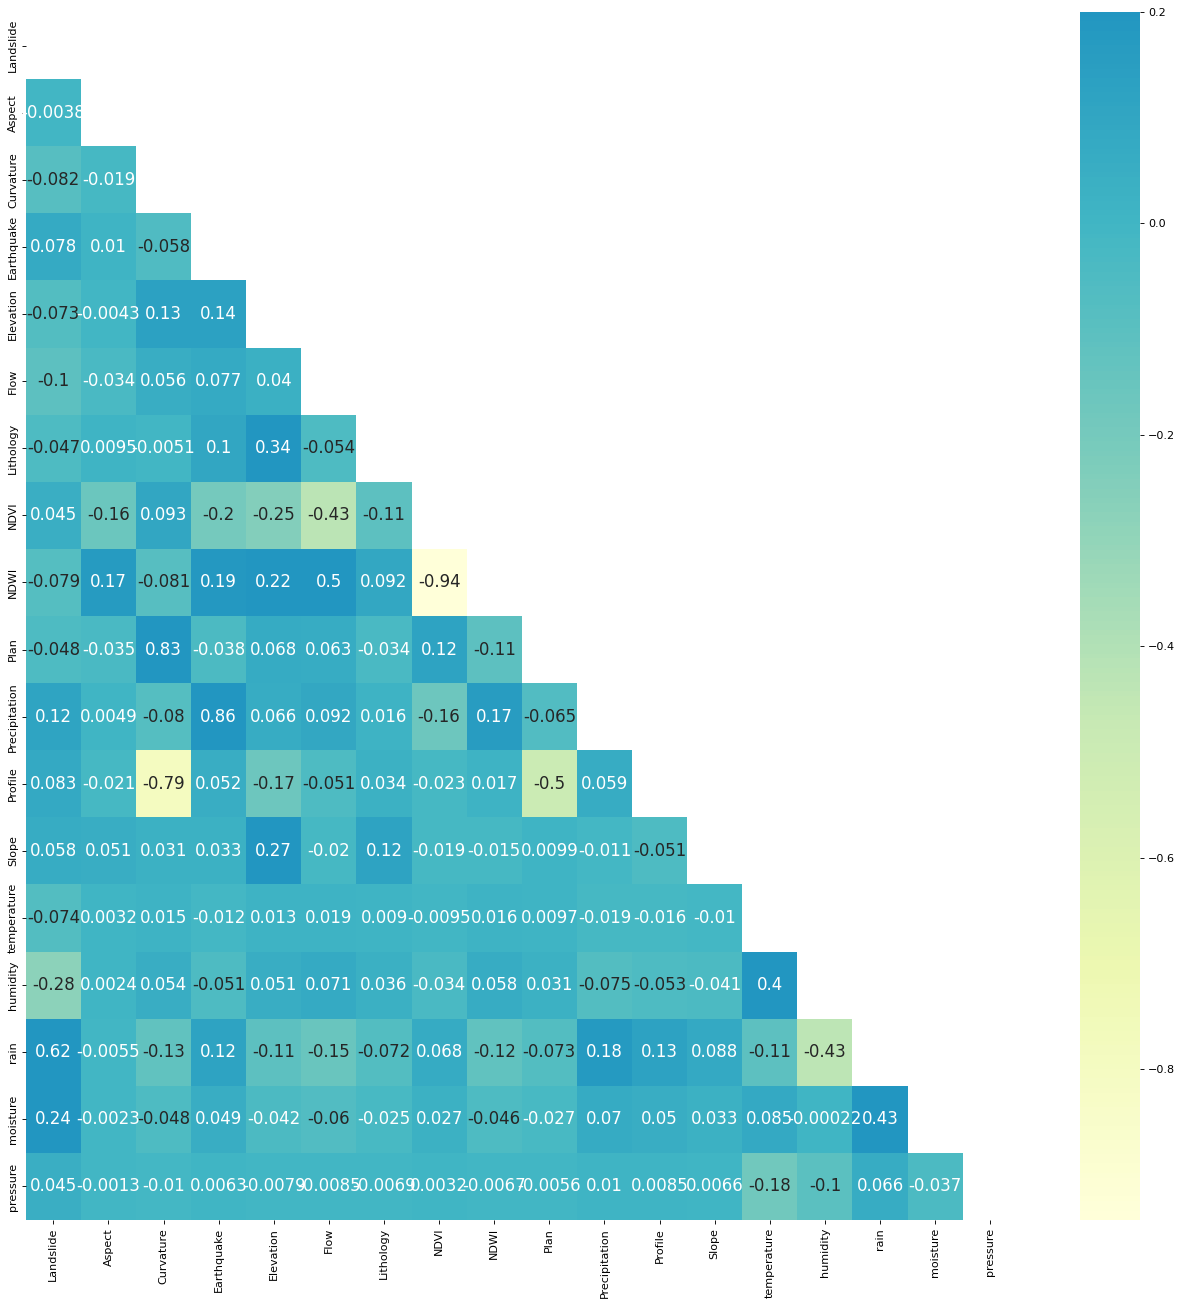

In [19]:
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(20,20),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), mask= mask, cmap="YlGnBu", vmax=.2, annot = True, center = 0,annot_kws={"fontsize":15})

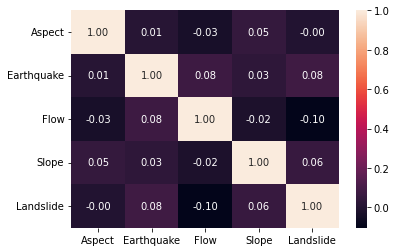

In [20]:
list1 = ['Aspect', 'Earthquake', 'Flow', 'Slope', 'Landslide']
sns.heatmap(df[list1].corr(), annot = True, fmt = '.2f')
plt.show()

In [ ]:
sns.barplot(x = 'rain', y='Landslide', data = df)
#g.set_ylabels('Landslide Prediction Probability')
plt.show()

<AxesSubplot:>

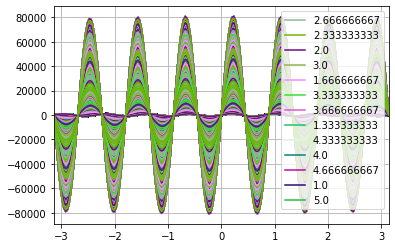

In [57]:
from pandas.plotting import andrews_curves
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
andrews_curves(df.drop("Landslide", axis=1), "Flow")

# Feature selection

In [66]:
print('Featured hights correlation with survival')
print('Feature\tCorrelation')
Landslide_Corr = df.corr()["Landslide"]
Landslide_Corr = Landslide_Corr[1:23] # remove the 'Survived'
Landslide_Corr= Landslide_Corr[np.argsort(Landslide_Corr, axis = 0)[::-1]] #sort in descending order
print(Landslide_Corr)

Featured hights correlation with survival
Feature	Correlation
rain             0.619399
moisture         0.241731
Precipitation    0.115105
Profile          0.083180
Earthquake       0.078365
Slope            0.058456
pressure         0.045108
NDVI             0.044766
Aspect          -0.003762
Lithology       -0.047081
Plan            -0.047619
Elevation       -0.073318
temperature     -0.073946
NDWI            -0.079159
Curvature       -0.081547
Flow            -0.103774
humidity        -0.275792
Name: Landslide, dtype: float64


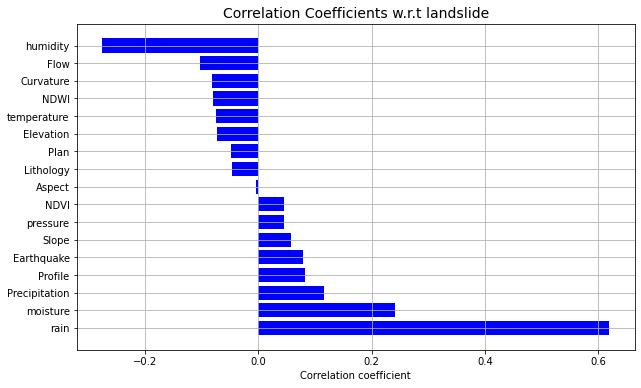

In [67]:
# Plot the top correlationin a bar chart for east visualisation.
width = 0
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(Landslide_Corr)), np.array(Landslide_Corr.values), color = 'blue')
ax.set_yticks(np.arange(len(Landslide_Corr)) + ((width)/1))
ax.set_yticklabels(Landslide_Corr.index, rotation ='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t landslide",fontsize = 14);
ax.grid(True)

In [92]:
df.loc[:].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Greens')\
                            .background_gradient(subset=['25%'], cmap='Spectral')\
                            .background_gradient(subset=['50%'], cmap='seismic')\
                            .background_gradient(subset=['75%'], cmap='viridis')\
                            .background_gradient(subset=['mean'], cmap='cubehelix')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Landslide,190890.000000,0.050574,0.219126,0.000000,0.000000,0.000000,0.000000,1.000000
Aspect,190890.000000,2.969244,0.765253,1.000000,2.333333,3.000000,3.666667,5.000000
Curvature,190890.000000,3.116282,0.594621,1.000000,2.666667,3.000000,3.666667,5.000000
Earthquake,190890.000000,2.011137,0.411790,1.000000,1.666667,2.000000,2.333333,3.000000
Elevation,190890.000000,2.588224,0.719438,1.000000,2.000000,2.666667,3.000000,5.000000
Flow,190890.000000,2.549421,0.718338,1.000000,2.000000,2.666667,3.000000,5.000000
Lithology,190890.000000,2.073608,0.904329,1.000000,1.333333,2.000000,2.666667,6.000000
NDVI,190890.000000,2.942134,0.762600,1.000000,2.333333,3.000000,3.333333,5.000000
NDWI,190890.000000,2.957473,0.792816,1.000000,2.333333,3.000000,3.666667,5.000000
Plan,190890.000000,3.138582,0.587506,1.000000,2.666667,3.000000,3.666667,5.000000


In [39]:
# step forward feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [40]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target
# here for simplicity I will use only numerical variables
# select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
data =df[numerical_vars]
data.shape

(190890, 18)

In [41]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Lithology'], axis=1),
    df['Lithology'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((133623, 17), (57267, 17))

In [42]:
# find and remove correlated features
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [43]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((133623, 14), (57267, 14))

In [45]:
X_train.fillna(0, inplace=True)

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf, n_features_to_select=8, direction='forward' ,scoring='accuracy',cv=5)

# Perform SFFS
sfs1_results = sfs1.fit(X_train, y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SAURABH\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAURABH\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\SAURABH\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 746, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\Users\SAURABH\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\multiclass.py", line 207, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [28]:
# Which features?
feat_cols = list(sfs.k_feature)
print(feat_cols)

AttributeError: type object 'SequentialFeatureSelector' has no attribute 'k_feature'